In [1]:
from cProfile import label
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from pandas.core.interchange.dataframe_protocol import DataFrame

In [2]:
x = pd.read_csv('ds_salaries.csv')
data = x.copy()

In [3]:
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Understanding our data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
data['Unnamed: 0'].nunique()


607

In [6]:
data['work_year'].unique()

array([2020, 2021, 2022])

In [7]:
data['experience_level'].unique()
# MI: Mid Level, SE: Senior Level, EN: Entry Level, EX: Expert Level(Executive)

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [8]:
data['employment_type'].unique()
# FT: Full Time, CT: Contract, PT: Part Time, FL: Freelance

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [9]:
data['job_title'].value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
BI Data Analyst                               6
Computer Vision Engineer                      6
ML Engineer                                   6
Lead Data Engineer                            6
Applied Data Scientist                        5
Business Data Analyst                         5
Data Engineering Manager      

In [10]:
data['company_size'].unique()
# L: Large, S: Small, M: Mid Size

array(['L', 'S', 'M'], dtype=object)

In [11]:
data['remote_ratio'].unique()
# 0: No remote work, 50: Partially Remote, 100: Fully Remote

array([  0,  50, 100])

##### We want to change these values from integer to string

In [12]:
def remote_changer(value):
    if value == 0:
        return 'Office'
    elif value == 50:
        return 'Partially Remote'
    elif value == 100:
        return 'Fully Remote'
    else:
        return 'Unknown'
    
data['remote_ratio'] = data['remote_ratio'].apply(remote_changer)
        

In [13]:
# Also change the column name
data.rename(columns={'remote_ratio': 'work_location'}, inplace=True)

# Cleaning Our Data

In [14]:
# Checking for NA values.
data.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_location         0
company_location      0
company_size          0
dtype: int64

In [15]:
# Checking for duplicates
print(data.duplicated().sum())

0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   work_location       607 non-null    object
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(4), object(8)
memory usage: 57.0+ KB


In [17]:
# Changing the first column name
data.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [18]:
data.head(2)

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_location,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,Office,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,Office,JP,S


###### Our data is already clean and in the correct data type formats.

# Analyzing Phase

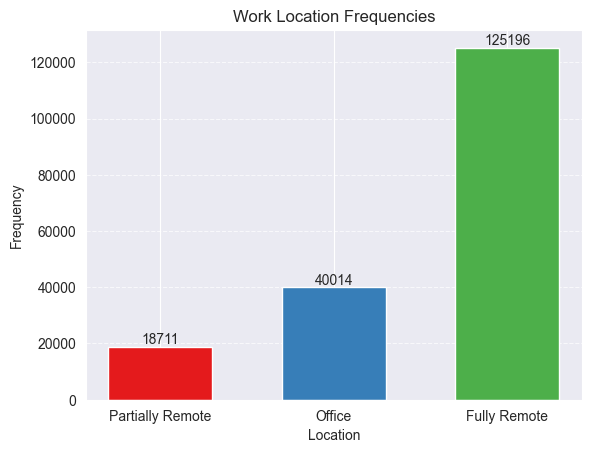

In [19]:
# Remote vs Office
x = data.groupby('work_location')['Index'].sum().sort_values()

colors = sns.color_palette('Set1', len(x))

plt.bar(x.index, x.values, color=colors, width=0.6)
plt.title('Work Location Frequencies')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, value in enumerate(x.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

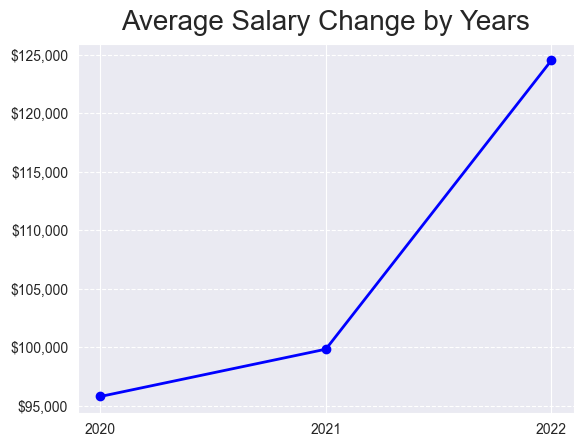

In [20]:
from matplotlib.ticker import FuncFormatter

# Average Salary Change and number of people change by Year

x = data.groupby('work_year')['salary_in_usd'].mean()

plt.plot(x.index, x.values, c='blue', linewidth=2, marker='o')
plt.xticks(x.index, x.index)
plt.title('Average Salary Change by Years', fontsize=20, pad=10)
plt.grid(axis='y', linestyle='--')
formatter = FuncFormatter(lambda x, pos: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)



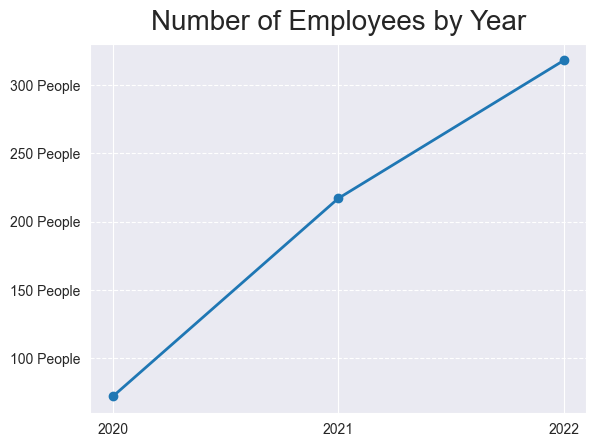

In [21]:
y = data.groupby('work_year')['Index'].count()

plt.plot(y.index, y.values, marker='o', linewidth=2)
plt.xticks(y.index, y.index)
plt.title('Number of Employees by Year', fontsize=20, pad=10)
plt.grid(axis='y', linestyle='--')
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f} People')
plt.gca().yaxis.set_major_formatter(formatter)


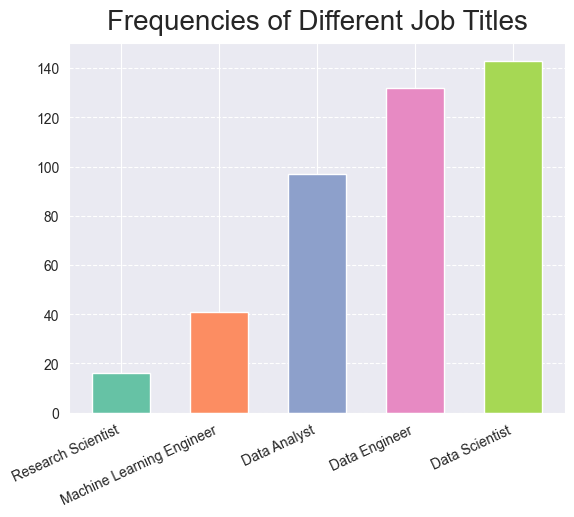

In [22]:
y = data['job_title'].value_counts().head(5).sort_values(ascending=True)
colors = sns.color_palette('Set2', len(y))


plt.bar(y.index, y.values, color=colors, width=0.6)
plt.title('Frequencies of Different Job Titles', fontsize=20, pad=10)
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y', linestyle='--')

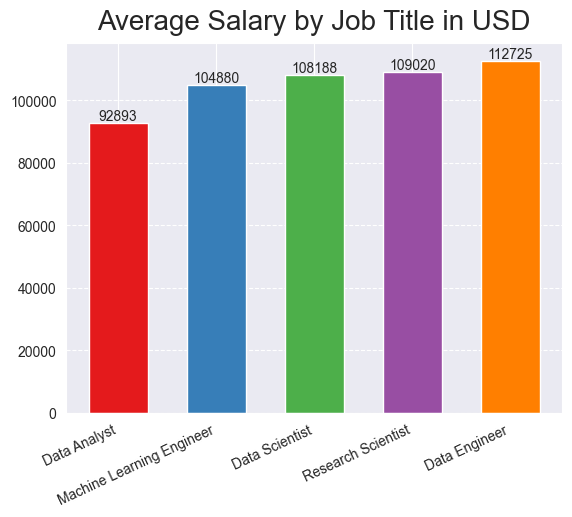

In [23]:
filtered_data = data[
    data['job_title'].isin(
        ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Machine Learning Engineer', 'Research Scientist']
    )
]
z = filtered_data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=True)

colors = sns.color_palette('Set1', len(z))


plt.bar(z.index, z.values, color=colors, width=0.6)
plt.title('Average Salary by Job Title in USD', fontsize=20, pad=10)
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y', linestyle='--')

for i, value in enumerate(z.values):
    plt.text(i, value + 0.5, round(value), ha='center', va='bottom')

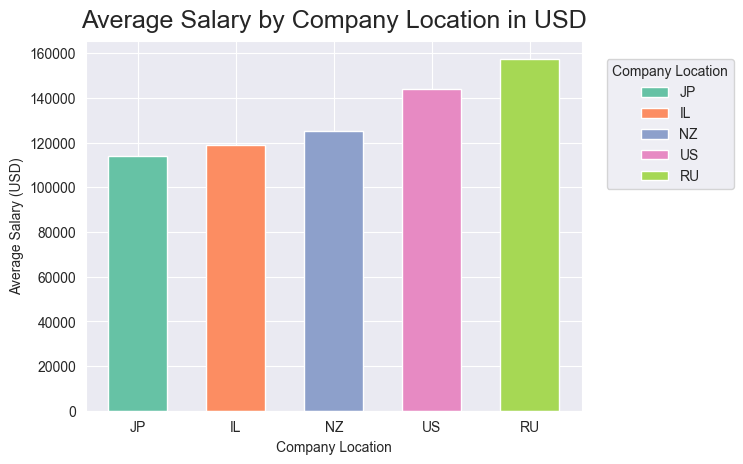

In [39]:
    k = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(5).sort_values(ascending=True)
    colors = sns.color_palette('Set2', len(k))
    
    
    plt.bar(k.index, k.values, color=colors, width=0.6, label=k.index)
    plt.title('Average Salary by Company Location in USD', fontsize=18, pad=10)
    plt.xlabel('Company Location')
    plt.ylabel('Average Salary (USD)')
    plt.legend(title='Company Location', loc='upper right', bbox_to_anchor=(1.32, 0.97))


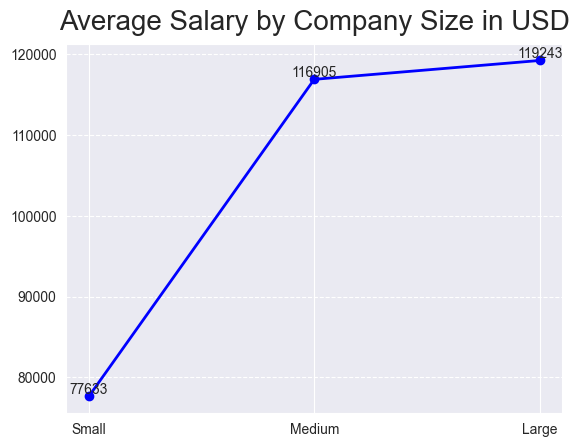

In [25]:
# Company size impact on salaries
p = data.groupby('company_size')['salary_in_usd'].mean().sort_values()

label_mapping = {'S':'Small', 'M':'Medium', 'L':'Large'}

plt.plot(p.index, p.values, marker='o', linewidth=2, color='blue')
plt.title('Average Salary by Company Size in USD', fontsize=20, pad=10)
plt.xticks(ticks=p.index ,labels=[label_mapping[e] for e in p.index])
plt.grid(axis='y', linestyle='--')

for i, value in enumerate(p.values):
    plt.text(i, value + 0.5, round(value) , ha='center', va='bottom')

In [41]:
data.groupby('company_size')['experience_level'].value_counts()

company_size  experience_level
L             MI                   86
              SE                   72
              EN                   29
              EX                   11
M             SE                  186
              MI                   98
              EN                   30
              EX                   12
S             EN                   29
              MI                   29
              SE                   22
              EX                    3
Name: count, dtype: int64

## Analysis is done and uploaded to Kaggle